<a target="_blank" href="https://colab.research.google.com/github/lukebarousse/Python_Data_Analytics_Course/blob/main/4_Problems/2_11_Pandas Explode.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [8]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## 🟨 Bar Plot of Top Skills for Cloud Engineers (2.11.1)

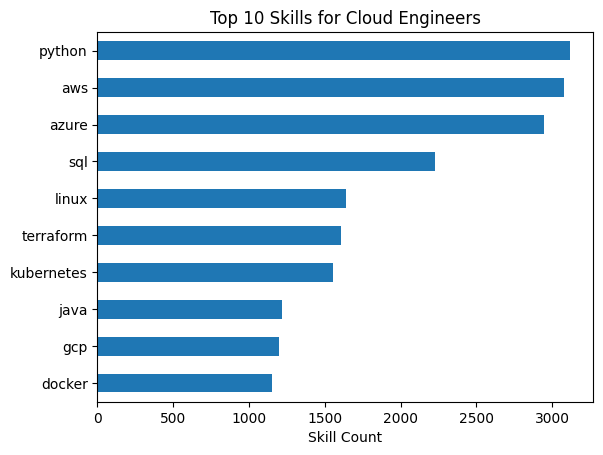

In [24]:
cloud_eng_skills_df = df.copy()

cloud_eng_skills_df = cloud_eng_skills_df.explode('job_skills')

cloud_eng_skills_df = cloud_eng_skills_df[cloud_eng_skills_df['job_title_short'] == 'Cloud Engineer'].value_counts('job_skills')

cloud_eng_skills_df = cloud_eng_skills_df.sort_values(ascending=False).head(10).sort_values()

cloud_eng_skills_df.plot(kind='barh')
plt.title('Top 10 Skills for Cloud Engineers')
plt.xlabel('Skill Count')
plt.ylabel('')
plt.show()

---

## 🟨 Average Salary by Skill (2.11.2)

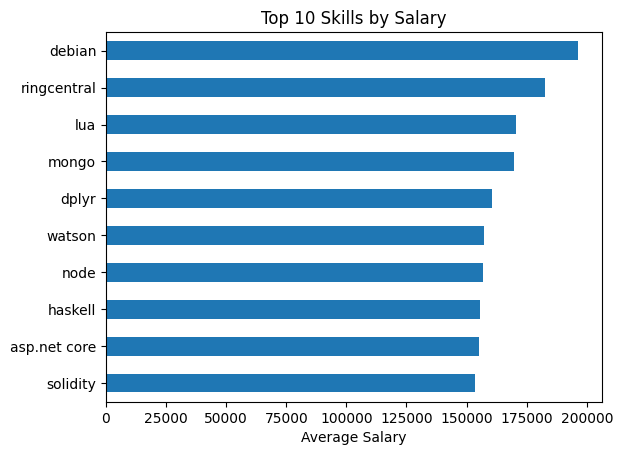

In [33]:
salary_by_skill_df = df.copy()

salary_by_skill_df = salary_by_skill_df.explode('job_skills')

salary_by_skill_df = salary_by_skill_df.pivot_table(index='job_skills', values='salary_year_avg', aggfunc='mean')

salary_by_skill_df = salary_by_skill_df.sort_values(by='salary_year_avg', ascending=False).head(10).sort_values(by='salary_year_avg')

salary_by_skill_df.plot(kind='barh')
plt.title('Top 10 Skills by Salary')
plt.legend().remove()
plt.ylabel('')
plt.xlabel('Average Salary')
plt.show()

---

## 🟥 Unique Skills Count (2.11.3)

In [47]:
skill_count_df = df.copy()

skill_count_df = skill_count_df.explode('job_skills')

skill_count_df = skill_count_df['job_skills'].value_counts()

int(skill_count_df.count())

252

---